Extracting EDF parameters from /home/data/vip24/multispectrogram/16771_6505.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19682303  =      0.000 ... 38441.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (33.010 sec)

Multitaper Spectrogram Properties: 
     Spectral Resolution: 1.5Hz
     Window Length: 4.0s
     Window Step: 1.0s
     Time Half-Bandwidth Product: 3
     Number of Tapers: 5
     Frequency Range: 0-25Hz
  

/home/data/vip24/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)



 Multitaper compute time: 1.3543618554249406 seconds


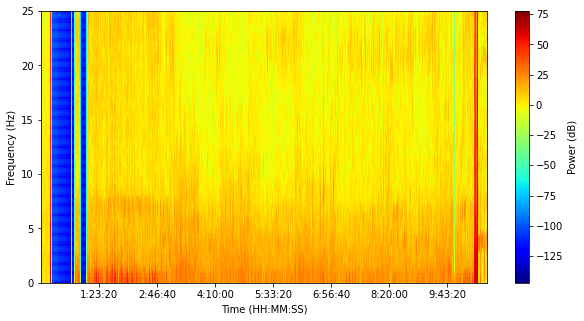

In [12]:
from multitaper_spectrogram_python import multitaper_spectrogram  # import multitaper_spectrogram function from the multitaper_spectrogram_python.py file
import numpy as np  # import numpy
from scipy.signal import chirp  # import chirp generation function
import matplotlib.pyplot as plt


# Set spectrogram params
fs = 100  # Sampling Frequency
frequency_range = [0, 25]  # Limit frequencies from 0 to 25 Hz
time_bandwidth = 3  # Set time-half bandwidth
num_tapers = 5  # Set number of tapers (optimal is time_bandwidth*2 - 1)
window_params = [4, 1]  # Window size is 4s with step size of 1s
min_nfft = 0  # No minimum nfft
detrend_opt = 'constant'  # detrend each window by subtracting the average
multiprocess = True  # use multiprocessing
cpus = 10  # use 3 cores in multiprocessing
weighting = 'unity'  # weight each taper at 1
plot_on = True  # plot spectrogram
clim_scale = False # do not auto-scale colormap
verbose = True  # print extra info
xyflip = False  # do not transpose spect output matrix

import mne
# Load the EDF file, excluding the EOGs and EKG channels
raw = mne.io.read_raw_edf('./16771_6505.edf', preload=True)
raw.resample(100)                      # Downsample the data to 100 Hz
raw.filter(0.1, 40)                    # Apply a bandpass filter from 0.1 to 40 Hz

raw.pick_channels(["EEG C4-M1"])
#raw.pick_channels(["EEG O1-A2"])

data = raw.to_data_frame()   # 将读取的数据转换成pandas的DataFrame数据格式
data_numpy = data.values[:,1]  #转换成numpy的特有数据格式

# Compute the multitaper spectrogram
spect, stimes, sfreqs = multitaper_spectrogram(data_numpy, fs, frequency_range, time_bandwidth, num_tapers, window_params, min_nfft, detrend_opt, multiprocess, cpus, weighting, plot_on, clim_scale, verbose, xyflip)

<ipython-input-24-ccbe6bebfede>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(stimes[5000:30000], sfreqs, spect[:,5000:30000], norm=norm)


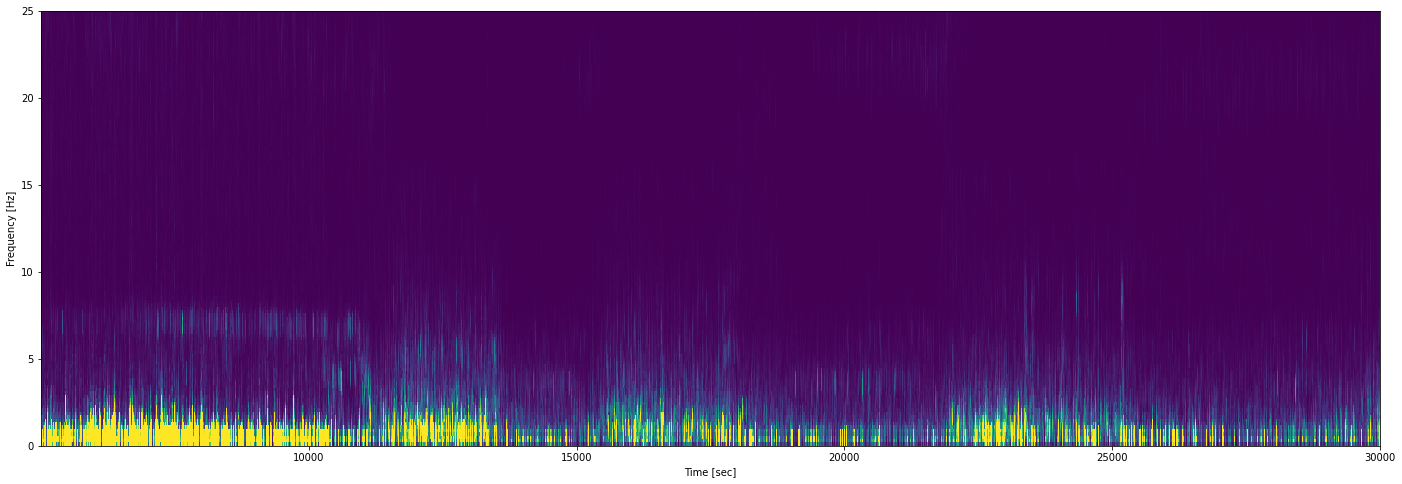

In [24]:
# f, t, Sxx = spectrogram_lspopt(x, fs, c_parameter=20.0)
import matplotlib.pyplot as plt

vmin, vmax = np.percentile(spect, [2.5, 97.5])
norm = Normalize(vmin=vmin, vmax=vmax)
fig, ax = plt.subplots(nrows=1, figsize=(24,8))

ax.pcolormesh(stimes[5000:30000], sfreqs, spect[:,5000:30000], norm=norm)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')

plt.show()

In [18]:
spect.shape

(129, 38439)

In [4]:
from matplotlib.colors import Normalize, ListedColormap

a = Normalize(1,5)
print(a)